In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df  = pd.read_csv('Temp Test.csv')

In [4]:
df.head()

,"Depth,ft","ROP,ft/h","WOB,lbs","RPM,rpm","Q,gpm"
0,5342.28825,55.612953,11420.17682,130,1176.676411
1,5342.28825,55.612953,11307.77397,129,1176.480840
2,5342.28825,55.612953,11734.90559,128,1176.676411
3,5342.28825,55.612953,12184.51997,129,1176.713306
4,5342.28825,55.612953,11689.94505,130,1176.636678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14060 entries, 0 to 14059
Data columns (total 5 columns):
Depth,ft    14060 non-null float64
ROP,ft/h    14060 non-null float64
WOB,lbs     14060 non-null float64
RPM,rpm     14060 non-null int64
Q,gpm       14060 non-null float64
dtypes: float64(4), int64(1)
memory usage: 549.3 KB


In [6]:
df.describe()

,"Depth,ft","ROP,ft/h","WOB,lbs","RPM,rpm","Q,gpm"
count,14060.000000,14060.000000,14060.000000,14060.000000,14060.000000
mean,5685.420831,49.780748,8158.461466,105.809673,1052.712482
std,154.239546,15.279831,7473.221172,40.517199,268.772546
min,5342.288250,16.897151,0.000000,0.000000,0.000000
25%,5574.156665,32.908429,0.000000,79.000000,1129.461678
50%,5700.343796,57.712790,11465.138350,129.000000,1176.520444
75%,5812.685204,63.913879,12791.497740,130.000000,1176.597074
max,5931.391960,68.671331,168020.474900,141.000000,1177.141343


In [7]:
#sns.pairplot(df)

In [8]:
#sns.heatmap(df.corr())

In [9]:
temp=df.drop('Depth,ft',axis=1)

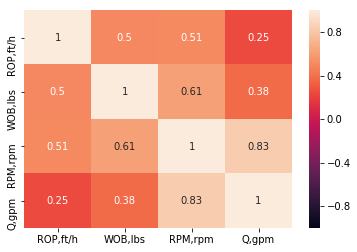

In [10]:
sns.heatmap(temp.corr(),annot=True, vmin=-1)

In [11]:
df.columns

Index(['Depth,ft', 'ROP,ft/h', 'WOB,lbs', 'RPM,rpm', 'Q,gpm'], dtype='object')

In [12]:
#X=df[[ 'WOB,lbs', 'Q,gpm', 'RPM,rpm']]

In [13]:
#Y=df['ROP,ft/h']

In [14]:
X = df.iloc[:, 2:5].values
Y = df.iloc[:, 1].values

In [15]:
X

array([[11420.17682 ,   130.      ,  1176.676411],
       [11307.77397 ,   129.      ,  1176.48084 ],
       [11734.90559 ,   128.      ,  1176.676411],
       ...,
       [12724.05544 ,   139.      ,  1176.48084 ],
       [13465.91682 ,   139.      ,  1176.48084 ],
       [12544.21028 ,   140.      ,  1176.676411]])

In [16]:
Y

array([55.61295278, 55.61295278, 55.61295278, ..., 33.10529046,
       33.10529046, 33.10529046])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=400, max_features=3, max_depth= 10,)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 6.764511708175976
Mean Squared Error: 110.69868171256094
Root Mean Squared Error: 10.521344101993858


In [21]:
errors = abs(Y_pred - Y_test)

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 6.76 degrees.
Accuracy: 83.32 %.


In [22]:
#################################################
###############################################
############ CROSS VALIDATION #####################

In [23]:
from pprint import pprint

In [24]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [26]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
##############################################################################
###############################################################################

In [27]:
df = pd.DataFrame(Y_test,Y_pred)
df.to_excel(excel_writer = "C:/Users/johna/Desktop/y_test.xlsx")

<Figure size 3600x1800 with 0 Axes>

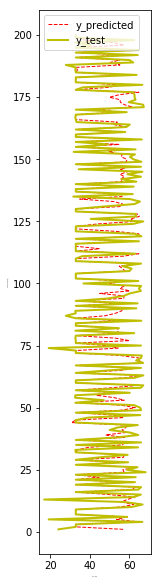

In [46]:
new_x=np.arange(1,len(Y_pred)+1)

fig = plt.figure(figsize=(2,1), dpi=1800)
fig, axes = plt.subplots(figsize=(2,10))

axes.plot(Y_pred[0:200] ,new_x[0:200], 'r--', linewidth=1, label="y_predicted")
axes.plot(Y_test[0:200], new_x[0:200],'y', linewidth=2, label="y_test" )
axes.set_ylabel("Relative Depth (ft)", size=1)
axes.set_xlabel("ROP (ft/h)", size=1)
axes.legend(loc=2, prop={'size': 10})


In [ ]:
##############################################################################################################################
##############################################################################################################################
##########   PARTICLE SWARM TEST  ##############

In [29]:


def evalROP(x):
    f = regressor.predict(x)
    return -0.9*f

In [30]:
import pyswarms as ps

In [31]:
x_max_list = [17000, 145, 1180]
x_min_list = [10000,100,1170]

In [32]:
x_max=np.array(x_max_list)
x_min=np.array(x_min_list)

In [33]:
from pyswarms.single.global_best import GlobalBestPSO

# instatiate the optimizer
x_max=np.array(x_max_list)
x_min=np.array(x_min_list)
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

Opt_ROP=[]
Opt_para=[]
del_h=[]
y_i1=0
Wf=1
for _ in range(5340,5941,10):
    y_i2=np.cbrt(((_*1.87*10**-10)/(1-y_i1))+(y_i1**3))
    y_i1=y_i2
    del_h.append(y_i2)
    def testROP(x):
        f = regressor.predict(x)
        return -Wf*f
    optimizer = GlobalBestPSO(n_particles=50, dimensions=3, options=options, bounds=bounds)
    cost, pos = optimizer.optimize(testROP, 2)
    Opt_ROP.append(cost)
    Opt_para.append(pos)
    Wf=1-y_i2

2020-08-05 23:55:03,231 - pyswarms.single.global_best - INFO - Optimize for 2 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2/2, best_cost=-65
2020-08-05 23:55:03,629 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -65.00827732733485, best pos: [12934.54195278   106.38789286  1170.00327832]
2020-08-05 23:55:03,634 - pyswarms.single.global_best - INFO - Optimize for 2 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2/2, best_cost=-64.4
2020-08-05 23:55:03,682 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -64.35850240566997, best pos: [16717.53239071   113.26237252  1176.0437386 ]
2020-08-05 23:55:03,688 - pyswarms.single.global_best - INFO - Optimize for 2 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2/2, best_cost=-64.2
2020-08-05 23:55:03,732 - pyswarms.single.global_best - INFO - Optimization finished | b

2020-08-05 23:55:06,038 - pyswarms.single.global_best - INFO - Optimize for 2 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2/2, best_cost=-62.6
2020-08-05 23:55:06,086 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -62.64445853648104, best pos: [11563.71412075   104.88812294  1175.47378548]
2020-08-05 23:55:06,091 - pyswarms.single.global_best - INFO - Optimize for 2 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2/2, best_cost=-62.6
2020-08-05 23:55:06,143 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -62.62618554588086, best pos: [12362.14686323   124.9234894   1179.36565919]
2020-08-05 23:55:06,148 - pyswarms.single.global_best - INFO - Optimize for 2 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2/2, best_cost=-62.6
2020-08-05 23:55:06,200 - pyswarms.single.global_best - INFO - Optimization finished |

In [34]:
neg_ROP=[i*-1 for i in Opt_ROP]

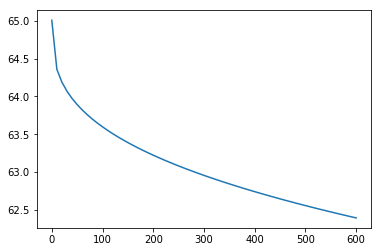

In [35]:
plt.plot(range(0,601,10), neg_ROP)